In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

#import training data and validation data
train = datasets.MNIST("",train = True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

validation = datasets.MNIST("",train = False,download=True,transform=transforms.Compose([transforms.ToTensor()]))
 
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
validationset = torch.utils.data.DataLoader(validation, batch_size=10,shuffle=True)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    #constructor
    def __init__(self):
        super().__init__() #superclass constructor
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x,dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [5]:
output = net(X)
output

tensor([[-2.2656, -2.3279, -2.3409, -2.4008, -2.4748, -2.2198, -2.2877, -2.1838,
         -2.2740, -2.2826]], grad_fn=<LogSoftmaxBackward>)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

epochs = 3

for epoch in range(epochs):
    for data in trainset: 
        #data is a batch of featuresets and labels
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward() #backpropogation
        optimizer.step()
    print(loss)



tensor(0.0584, grad_fn=<NllLossBackward>)
tensor(0.1732, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0


with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view([-1,784]))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy:", round(correct/total,3))


Accuracy: 0.985


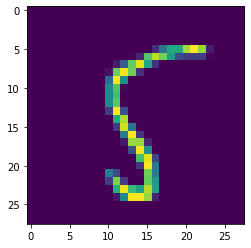

In [27]:
import matplotlib.pyplot as plt


plt.imshow(X[3].view([28,28]))
plt.show()

In [28]:
print(torch.argmax(net(X[3].view(-1,784))[0]))

tensor(5, grad_fn=<NotImplemented>)
